In [1]:
import pandas as pd
import numpy as np

In [2]:
#load dataset
df = pd.read_csv('Healthcare-stroke-data.csv')

In [3]:
#dataset size
df.shape

(5110, 12)

In [4]:
#column names
df.columns.tolist()

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [5]:
# Drop ID column (not useful for prediction)
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
#data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
#satistical summary
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
#check missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#fill missing BMI values using median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8800\104560842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [10]:
#check missing values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
#check duplicates
df.duplicated().sum()

0

In [12]:
#data encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['gender', 'ever_married', 'work_type',
                    'Residence_type', 'smoking_status']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])



In [13]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


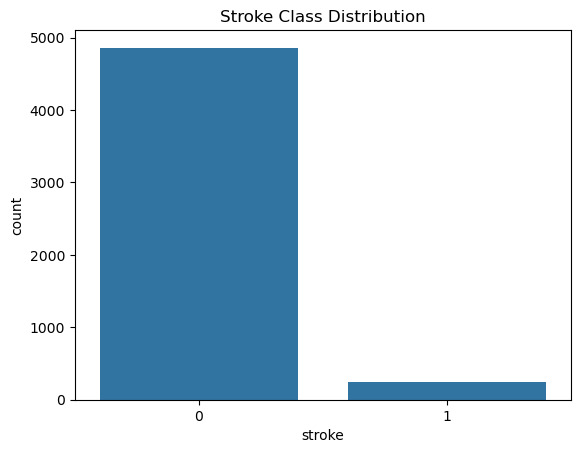

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#target class distribution
sns.countplot(x='stroke', data=df)
plt.title("Stroke Class Distribution")
plt.show()

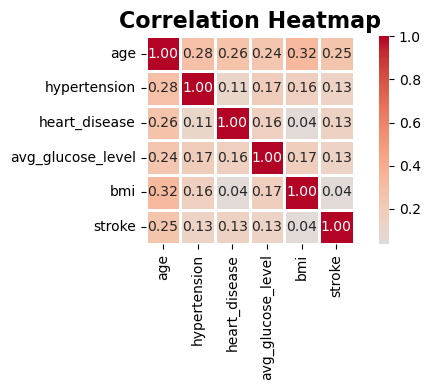

In [15]:
#correlation analysis (numerical features)
numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
correlation_data = df[numerical_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [16]:
print(correlation_data['stroke'].sort_values(ascending=False))

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.036110
Name: stroke, dtype: float64


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

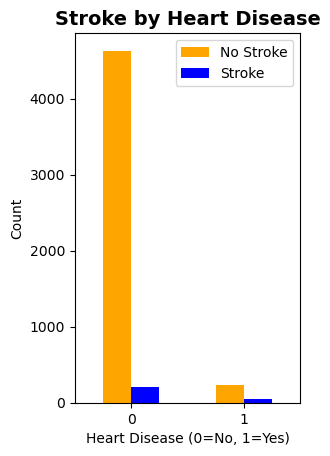

In [17]:
#bar graph for stroke by heart disease
plt.subplot(1, 2, 1)
heart_stroke = pd.crosstab(df['heart_disease'], df['stroke'])
heart_stroke.plot(kind='bar', ax=plt.gca(), color=['orange', 'blue'])
plt.title('Stroke by Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(['No Stroke', 'Stroke'])
plt.xticks(rotation=0)

Text(0, 0.5, 'Age')

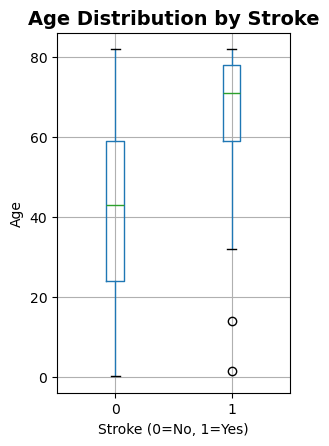

In [18]:
#box plot for age distribution by stroke 
plt.subplot(1, 2, 1)
df.boxplot(column='age', by='stroke', ax=plt.gca())
plt.title('Age Distribution by Stroke', fontsize=14, fontweight='bold')
plt.suptitle('')  
plt.xlabel('Stroke (0=No, 1=Yes)')
plt.ylabel('Age')

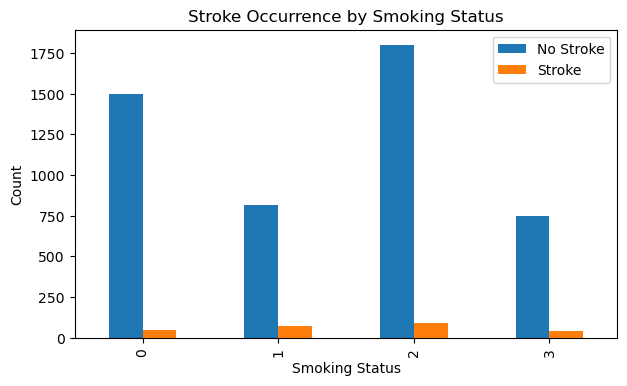

In [19]:
#bargraph for stroke occurance by smoking status
smoking_stroke = pd.crosstab(df['smoking_status'], df['stroke'])

smoking_stroke.plot(kind='bar', figsize=(7,4))
plt.title('Stroke Occurrence by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(['No Stroke', 'Stroke'])
plt.show()


In [20]:
#train-test-split
from sklearn.model_selection import train_test_split

X = df.drop('stroke', axis=1)
y = df['stroke']

# Stratified split to preserve class ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#class imbalance handling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#logistic regression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_resampled, y_train_resampled)

y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

acc_lr

0.7332028701891715

In [22]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
dt.fit(X_train_resampled, y_train_resampled)


y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

acc_dt

0.6568819308545336

In [23]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100, random_state=42, max_depth=6, class_weight='balanced'
)
rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

acc_rf

0.7227658186562296

In [24]:
#model evaluation
from sklearn.metrics import classification_report

print("Logistic Regression\n", classification_report(y_test, y_pred_lr))
print("Decision Tree\n", classification_report(y_test, y_pred_dt))
print("Random Forest\n", classification_report(y_test, y_pred_rf))



Logistic Regression
               precision    recall  f1-score   support

           0       0.98      0.73      0.84      1458
           1       0.13      0.76      0.22        75

    accuracy                           0.73      1533
   macro avg       0.56      0.75      0.53      1533
weighted avg       0.94      0.73      0.81      1533

Decision Tree
               precision    recall  f1-score   support

           0       0.98      0.65      0.78      1458
           1       0.10      0.77      0.18        75

    accuracy                           0.66      1533
   macro avg       0.54      0.71      0.48      1533
weighted avg       0.94      0.66      0.75      1533

Random Forest
               precision    recall  f1-score   support

           0       0.98      0.73      0.83      1458
           1       0.11      0.64      0.18        75

    accuracy                           0.72      1533
   macro avg       0.54      0.68      0.51      1533
weighted avg       0.93

In [25]:
#comparison table
from sklearn.metrics import precision_score, recall_score, f1_score

results = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf)
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ]
})
results


,Algorithm,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.127232,0.760000,0.217973,0.733203
1,Decision Tree,0.102293,0.773333,0.180685,0.656882
2,Random Forest,0.107623,0.640000,0.184261,0.722766


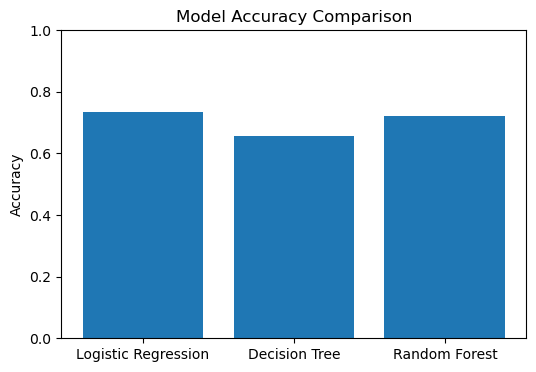

In [26]:
#visualization of model accuracy
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [acc_lr, acc_dt, acc_rf]

plt.figure(figsize=(6,4))
plt.bar(models, accuracy)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()
